In [17]:
import patato as pat

import numpy as np
from matplotlib import pyplot as plt
from patato.data import get_msot_time_series_example

In [18]:
pa = get_msot_time_series_example("so2")[0:1, 0:1]

In [19]:
N, fov = (100, 100, 1), (0.025, 0.025, 1)

In [20]:
mb = pat.ModelBasedReconstruction(N, fov, pa_example=pa)

GPU False
Loading model


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/else01/Documents/Code Development/patato/patato/recon/model_based/model_based.py:216: UserWarning: This class is experimental. If you would like to contribute to further development of this approach, please get in touch.
  warnings.warn("This class is experimental. If you would like to contribute to further development of this "


In [21]:
pre = pat.PreProcessor()
bp = pat.Backprojection(N, fov)

ts_filtered, settings, _ = pre.run(pa.get_time_series(), pa)
bp_rec, _, _ = bp.run(ts_filtered, pa, **settings)

In [22]:
rec, _, _ = mb.run(pa.get_time_series(), pa)

RegularizedInversion
-----------------------------------------------------------------
The Operator Op has 519680 rows and 10000 cols
Regs=[<10000x10000 Identity with dtype=float64>]
epsRs=[1]
-----------------------------------------------------------------
 
LSQR            Least-squares solution of  Ax = b
The matrix A has 529680 rows and 10000 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-06                 conlim = 1.00e+08
btol = 1.00e-06               iter_lim =       10
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   2.717e+07  2.717e+07    1.0e+00  9.2e-07
     1 -7.49397e-02   2.717e+07  2.717e+07    1.0e+00  1.0e-02   1.3e+03  1.0e+00
     2 -5.89830e-01   2.716e+07  2.716e+07    1.0e+00  5.5e-03   1.9e+03  2.4e+00
     3 -1.90245e-01   2.716e+07  2.716e+07    1.0e+00  4.5e-03   2.3e+03  4.3e+00
     4 -1.00710e-01   2.716e+07  2.716e+07    1.0e+00  3.5e-03   2.7e+03  6.6e+00
     5  2.39865e-0

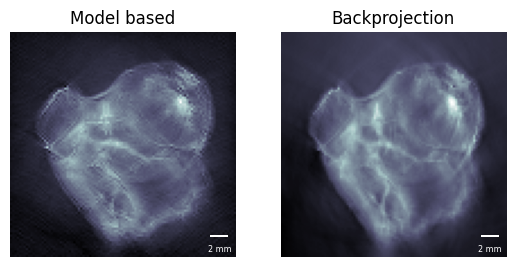

In [23]:
fig, axes = plt.subplots(1, 2)
rec.imshow(ax = axes[0])
bp_rec.imshow(ax = axes[1])
axes[0].set_title("Model based")
axes[1].set_title("Backprojection")
plt.show()

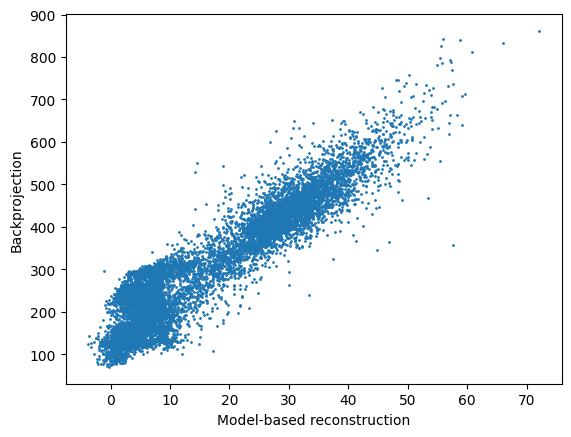

In [28]:
plt.scatter(rec.raw_data.flatten(), bp_rec.raw_data.flatten(), s=1)
plt.xlabel("Model-based reconstruction")
plt.ylabel("Backprojection")
plt.show()